In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_csv(r"C:\Users\afroz\OneDrive\Desktop\New folder\movie box office prediction\boxoffice.csv", encoding ='latin-1')
df.head()


,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [7]:
df.tail()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
2689,Get Out,"$176,040,665","$255,407,969",Universal Pictures,"$33,377,060","2,781","$4,500,000",R,"Horror,Mystery,Thriller",676
2690,The Lego Batman Movie,"$175,750,384","$311,950,384",Warner Bros.,"$53,003,468","4,088","$80,000,000",PG,"Action,Animation,Comedy,Family",325
2691,Coco,"$209,726,015","$807,082,196",Walt Disney Studios Motion Pictures,"$50,802,605","3,987",NaN,PG,"Adventure,Animation,Family,Fantasy,Music,Mystery",405
2692,Dunkirk,"$188,045,546","$525,245,546",Warner Bros.,"$50,513,488","3,720","$100,000,000",PG-13,"Action,Drama,History,Thriller,War",168
2693,Justice League,"$229,024,295","$657,924,295",Warner Bros.,"$93,842,239","4,051",NaN,PG-13,"Action,Adventure,Fantasy,Sci-Fi",410


In [12]:
df.describe().T

,count,unique,top,freq
title,2694,2468,A Beautiful Planet,3
domestic_revenue,2694,2495,"$11,272,008",3
world_revenue,2694,2501,"$25,681,505",3
distributor,2694,248,Fathom Events,292
opening_revenue,2390,2176,"$4,696",3
opening_theaters,2383,732,1,503
budget,397,124,"$40,000,000",14
MPAA,1225,8,R,568
genres,2655,567,Documentary,351
release_days,2694,457,347,35


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   object
 2   world_revenue     2694 non-null   object
 3   distributor       2694 non-null   object
 4   opening_revenue   2390 non-null   object
 5   opening_theaters  2383 non-null   object
 6   budget            397 non-null    object
 7   MPAA              1225 non-null   object
 8   genres            2655 non-null   object
 9   release_days      2694 non-null   object
dtypes: object(10)
memory usage: 210.6+ KB


In [11]:
df.shape

(2694, 10)

# DATA CLEANING

In [13]:
to_remove = ['world_revenue','opening_revenue']
df.drop(to_remove, axis =1, inplace = True)

In [14]:
df.isnull().sum()*100/df.shape[0]

title                0.000000
domestic_revenue     0.000000
distributor          0.000000
opening_theaters    11.544172
budget              85.263549
MPAA                54.528582
genres               1.447661
release_days         0.000000
dtype: float64

In [15]:
df.drop('budget', axis =1, inplace = True)

In [17]:
for col in ['MPAA', 'genres']:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df.dropna(inplace=True)
#when both sum is used it gives a single digit and single sum is used it gives description.
df.isnull().sum().sum()

0

In [25]:
#the commented code below only works once due to conversion and second time its gives error as it is already changed dtype
#df['domestic_revenue'] = df['domestic_revenue'].str[1:]
#for col in ['domestic_revenue','opening_theaters', 'release_days']:
    #df[col] = df[col].str.replace(',','')
    
    temp = (~df[col].isnull())
    df[temp][col]= df[temp][col].convert_dtypes(float)
    df[col] = pd.to_numeric(df[col],errors = 'coerce')

AttributeError: Can only use .str accessor with string values!

title               object
domestic_revenue     int64
distributor         object
opening_theaters     int64
MPAA                object
genres              object
release_days         int64
dtype: object

In [30]:
df.head()

,title,domestic_revenue,distributor,opening_theaters,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,620181382,Walt Disney Studios Motion Pictures,4232,PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,226008385,Universal Pictures,4310,PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,412563408,Warner Bros.,4165,PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,389813101,Walt Disney Studios Motion Pictures,4347,PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,504014165,Walt Disney Studios Motion Pictures,4210,PG,"Family,Fantasy,Musical,Romance",290


# EDA

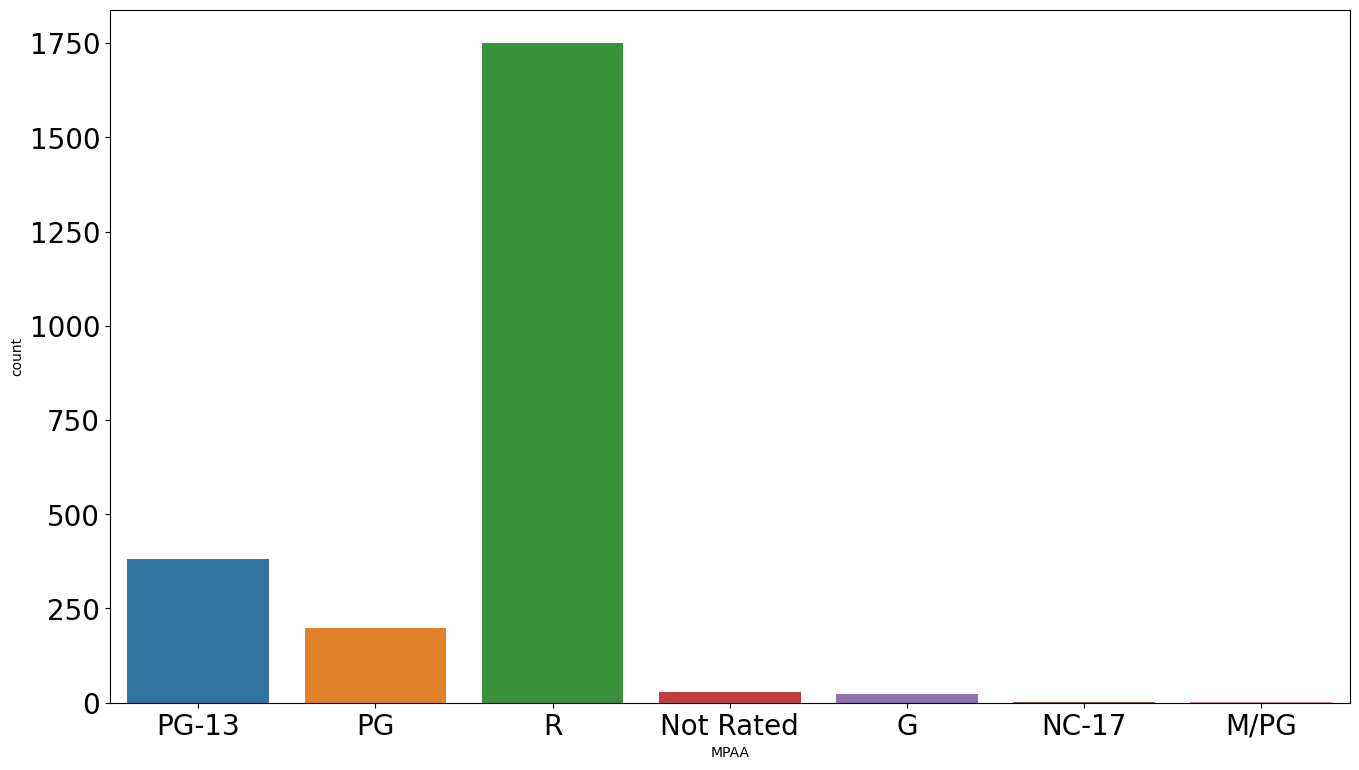

In [36]:
plt.figure(figsize = (16,9))
sns.countplot(df['MPAA'])

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [37]:
df.groupby('MPAA').mean()['domestic_revenue']

MPAA
G            3.539276e+07
M/PG         5.113500e+05
NC-17        1.368800e+04
Not Rated    4.897703e+05
PG           5.379622e+07
PG-13        5.891966e+07
R            6.591336e+06
Name: domestic_revenue, dtype: float64

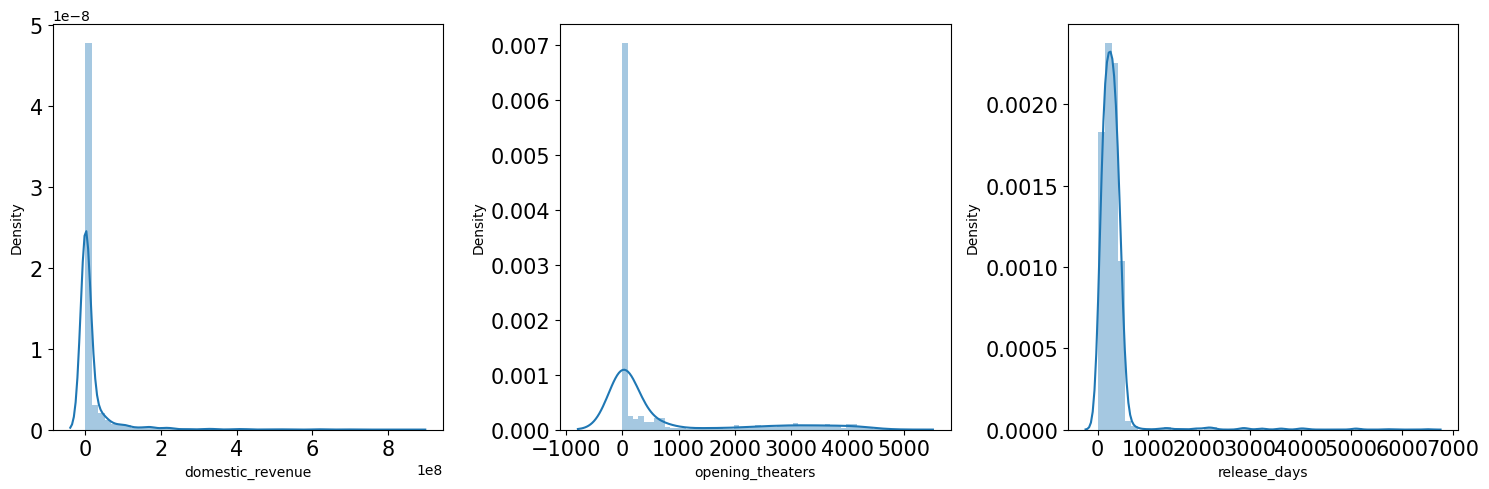

In [43]:
plt.subplots(figsize = (15,5))
features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.distplot(df[col])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)

plt.tight_layout()

plt.show()

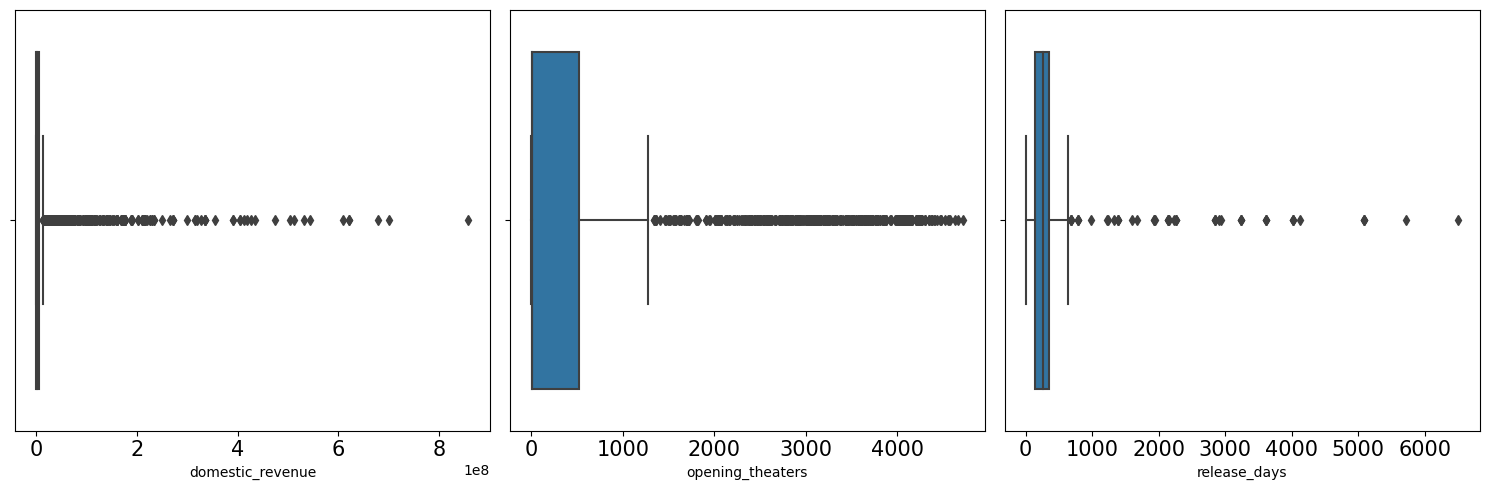

In [44]:
plt.subplots(figsize = (15,5))
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.boxplot(df[col])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
plt.tight_layout()
plt.show()
    

In [45]:
for col in features:
    df[col] =df[col].apply(lambda x: np.log10(x))

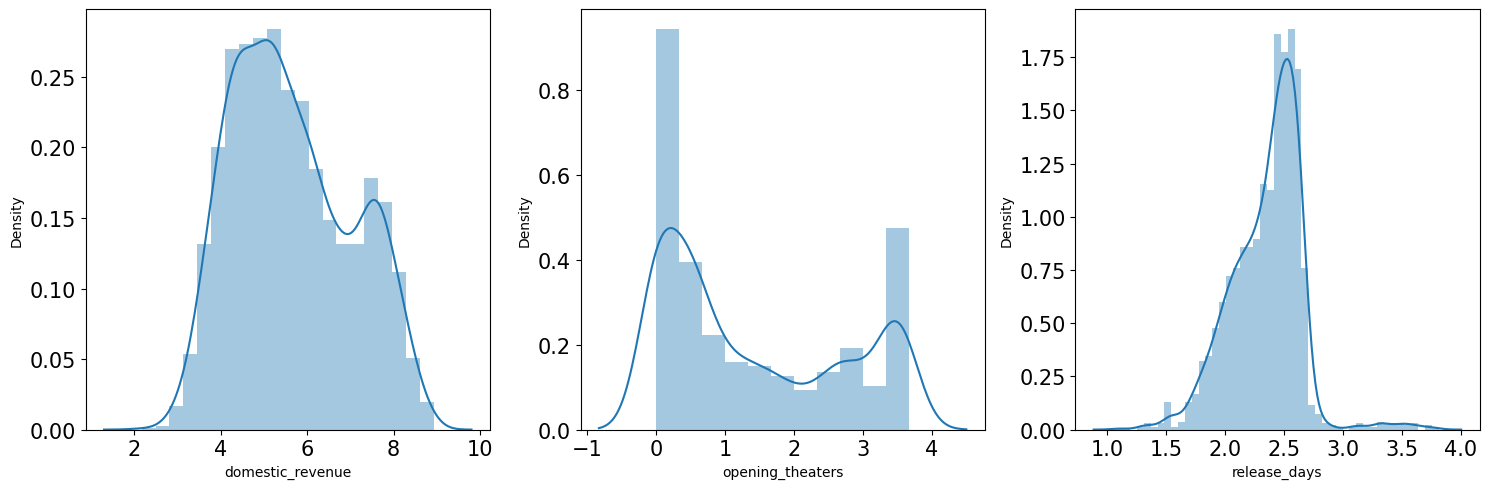

In [46]:
plt.subplots(figsize =(15,5))
for i, col in enumerate(features):
    plt.subplot(1,3,i+1)
    sns.distplot(df[col])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
plt.tight_layout()
plt.show()

# feature engineering

The code you provided demonstrates how to perform text feature extraction using the CountVectorizer from scikit-learn. This process converts text data (in this case, the 'genres' column in the DataFrame df) into numerical feature vectors suitable for machine learning models. The code then expands these feature vectors into separate columns for each unique genre in the dataset.

This type of feature extraction is commonly used for categorical text data, like genres in this case, to represent them in a way that machine learning algorithms can process. It enables you to utilize the genre information in predictive modeling and other data analysis tasks.


In [ ]:
#convert to matrix of tokens
vectorizer = CountVectorizer()

#count vectorizer done on genres column
vectorizer.fit(df['genres'])

# transforms the genres to numeric vector and then to array format
features = vectorizer.transform(df['genres']).toarray()

genres = vectorizer.get_feature_names()
for i,name in enumerate(genres):
    df[name] = features[:,i]
    
df.drop('genres', axis =1 , inplace = True)

# this code wont work because it already ran once and genre column is removed
# data set for next step is changed successfully 
#no need to get confused

In [51]:
df.head()

,title,domestic_revenue,distributor,opening_theaters,MPAA,release_days,action,adult,adventure,animation,...,noir,reality,romance,sci,short,sport,thriller,tv,war,western
0,Star Wars: Episode VIII - The Last Jedi,8.792519,Walt Disney Studios Motion Pictures,3.626546,PG-13,2.582063,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,The Fate of the Furious,8.354125,Universal Pictures,3.634477,PG-13,2.418301,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,Wonder Woman,8.615491,Warner Bros.,3.619615,PG-13,2.336460,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,Guardians of the Galaxy Vol. 2,8.590856,Walt Disney Studios Motion Pictures,3.638190,PG-13,2.382017,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,Beauty and the Beast,8.702443,Walt Disney Studios Motion Pictures,3.624282,PG,2.462398,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
rem = 0
for col in df.loc[:, 'action': 'western'].columns:
    
    if(df[col]==0).mean()>0.95:
        rem +=1
        df.drop(col, axis =1, inplace = True)
        
print(rem)
print(df.shape)

11
(2383, 24)


# label encoding


Label encoding is a technique used in data preprocessing to convert categorical variables into numeric format. It assigns a unique integer to each unique category within the variable. The main use of label encoding is to prepare categorical data for machine learning algorithms that require numeric inputs

In [56]:
for col in ['distributor', 'MPAA']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

<AxesSubplot:>

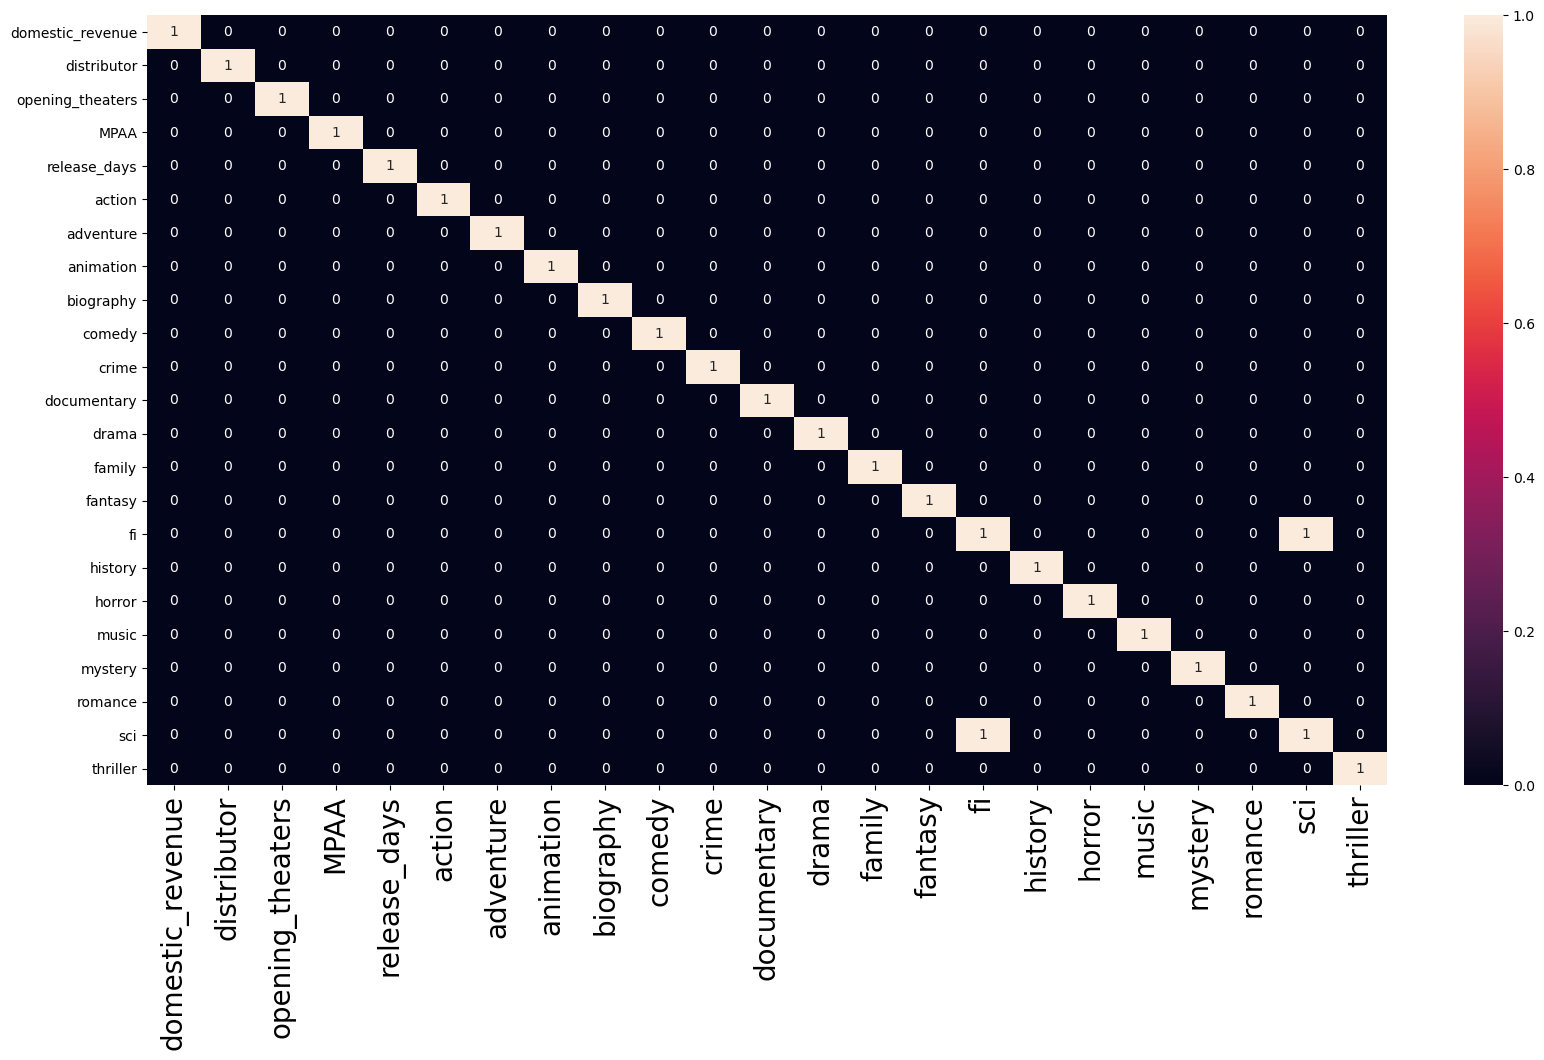

In [63]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize=20)
sns.heatmap(df.corr()>0.8, annot = True, cbar = True)


# model development

In [65]:
features = df.drop(['title','domestic_revenue','fi'], axis = 1)

target = df['domestic_revenue'].values

x_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size =0.1, random_state =22)
x_train.shape, X_val.shape

((2144, 21), (239, 21))

In [66]:
#normalizing the features for stable and fast training
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
X_val = scaler.transform(X_val)

In [74]:
from sklearn.metrics import mean_absolute_error as mae
model = XGBRegressor()
model.fit(x_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [77]:
train_preds = model.predict(x_train)
print("training error:" , mae(Y_train, train_preds))

val_preds = model.predict(X_val)
print('validation error:', mae(Y_val, val_preds))
print()

training error: 0.13244736533748125
validation error: 0.42306483705722453

